In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
per_diet_recom_path = "../datasets/Personalized Medical Diet Recommendations Dataset/Personalized_Diet_Recommendations.csv"

In [141]:
original_df = pd.read_csv(per_diet_recom_path)
original_df

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet


### Features taken from Module A - Data Visulaization
### Also taking out the target

In [142]:
features=['Age','Gender','BMI','Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Level','Blood_Sugar_Level', 'Daily_Steps','Sleep_Hours','Alcohol_Consumption','Smoking_Habit','Dietary_Habits']
target_name = "Recommended_Meal_Plan"
len(features)

12

### Creating new dataframe from the given features only

In [143]:
df = original_df[features]
df

,Age,Gender,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Daily_Steps,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits
0,56,Other,24.84,175,75,219,124,11452,7.6,No,Yes,Vegetarian
1,69,Female,38.99,155,72,208,72,12962,6.3,Yes,No,Vegetarian
2,46,Female,40.22,137,101,171,145,7898,9.9,No,No,Vegetarian
3,32,Female,30.41,148,91,258,235,6602,4.2,No,No,Vegetarian
4,60,Female,44.79,160,109,260,248,9810,9.0,No,No,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,Female,33.46,115,78,279,112,5723,6.5,No,No,Vegetarian
4996,39,Female,25.39,110,97,258,93,4786,7.2,Yes,No,Keto
4997,48,Female,22.41,113,82,183,151,5390,8.8,No,No,Regular
4998,34,Other,35.96,105,75,248,153,12887,7.0,No,Yes,Keto


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   int64  
 1   Gender                    5000 non-null   object 
 2   BMI                       5000 non-null   float64
 3   Blood_Pressure_Systolic   5000 non-null   int64  
 4   Blood_Pressure_Diastolic  5000 non-null   int64  
 5   Cholesterol_Level         5000 non-null   int64  
 6   Blood_Sugar_Level         5000 non-null   int64  
 7   Daily_Steps               5000 non-null   int64  
 8   Sleep_Hours               5000 non-null   float64
 9   Alcohol_Consumption       5000 non-null   object 
 10  Smoking_Habit             5000 non-null   object 
 11  Dietary_Habits            5000 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 468.9+ KB


In [145]:
for col in df.select_dtypes(include=['object']).columns:
    print(col)

Gender
Alcohol_Consumption
Smoking_Habit
Dietary_Habits


In [146]:
class RawtoTrain:
    def __init__(self, blood_pressure_mapping, cholestrol_mapping, blood_sugar_mapping):
        self.blood_pressure_mapping = blood_pressure_mapping
        self.cholestrol_mapping = cholestrol_mapping
        self.blood_sugar_mapping = blood_sugar_mapping

    
    def bmi_converter(self, height_cm: int, weight_kg: int):
        return (weight_kg * 10000) / height_cm ** 2

    
    def blood_pressure_converter(self, systolic: int, diastolic: int):
        if systolic < 90 or diastolic < 60:
            value = "Low"
        elif 90 <= systolic <= 129 and 60 <= diastolic <= 79:
            value = "Normal"
        elif systolic > 129 or diastolic > 79:
            value =  "High"
        else:
            value = "Normal"
        
        return value
        
   
    def cholesterol_converter(self, cholesterol_level: int):
        if cholesterol_level < 200:
            value = "Optimal"
        elif 200 <= cholesterol_level < 240:
            value = "Borderline"
        else:
            value = "High"
        
        #return self.cholestrol_mapping[value]
        return value

    
    def blood_sugar_converter(self, blood_sugar_level: int):
        if blood_sugar_level < 70:
            value = "Low"
        elif 70 <= blood_sugar_level <= 99:
            value = "Normal"
        else:  #blood_sugar_level >= 100
            value = "High"
        
        #return self.blood_pressure_mapping[value]
        return value
    
    def __drop_converted_features(self, df):
        columns_to_be_dropped = ["Blood_Pressure_Systolic", "Blood_Pressure_Diastolic","Cholesterol_Level", "Blood_Sugar_Level"]
        df = df.drop(columns= columns_to_be_dropped)
        return df

    def raw_to_train_feature_conv(self, df):
        '''
        Takes in the original dataframe and returns the transformed df that is ready to train.
        Convert df into user required data format
        '''
        
        df["blood_pressure_converted"] = df.apply(lambda row: self.blood_pressure_converter(row["Blood_Pressure_Systolic"], row["Blood_Pressure_Diastolic"]), axis = 1)
        df["cholesterol_level_converted"] = df.apply(lambda row: self.cholesterol_converter(row["Cholesterol_Level"]), axis = 1)
        df["blood_sugar_level_converted"] = df.apply(lambda row: self.blood_sugar_converter(row["Blood_Sugar_Level"]), axis= 1)

        df = self.__drop_converted_features(df)
        
        return df
        
                                              

In [147]:
class RawtoTrainLabel:
    def __init__(self, single_column):
        self.label_to_index = {}
        self.index_to_label = {}
        self.single_column = single_column
        self.__create_mapping()
    
    def __create_mapping(self):
        unique_values = sorted(set(self.single_column))
        self.label_to_index = {unique_value : idx +1 for idx, unique_value in enumerate(unique_values)}
        self.index_to_label = {idx+ 1 : unique_value for idx, unique_value in enumerate(unique_values)}
    
    def convert_label_to_index(self, column):
        return [self.label_to_index[value] for value in column]

    def convert_index_to_label(self, column):
        return [self.index_to_label[value] for value in column]

In [148]:
blood_pressure_mapping = {
    "Low" : 1,
    "Normal" : 2,
    "High" : 2
}
cholestrol_mapping = {
    "Optimal" : 1,
    "Borderline" : 2,
    "High" : 3
}

blood_sugar_mapping = {
    "Low" : 1,
    "Normal": 2,
    "High": 3
}

### Converted thesse values to categorigal
- BMI calculation from height and weight
- blood pressure range (High, Normal, Low)
- cholesterol_level
- blood_sugar_level

In [149]:
raw_to_train = RawtoTrain(blood_pressure_mapping, cholestrol_mapping, blood_sugar_mapping)
df = raw_to_train.raw_to_train_feature_conv(df)
df

/tmp/ipykernel_1597/449071646.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["blood_pressure_converted"] = df.apply(lambda row: self.blood_pressure_converter(row["Blood_Pressure_Systolic"], row["Blood_Pressure_Diastolic"]), axis = 1)
/tmp/ipykernel_1597/449071646.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cholesterol_level_converted"] = df.apply(lambda row: self.cholesterol_converter(row["Cholesterol_Level"]), axis = 1)
/tmp/ipykernel_1597/449071646.py:61: SettingWithCopyWarning: 
A v

,Age,Gender,BMI,Daily_Steps,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits,blood_pressure_converted,cholesterol_level_converted,blood_sugar_level_converted
0,56,Other,24.84,11452,7.6,No,Yes,Vegetarian,High,Borderline,High
1,69,Female,38.99,12962,6.3,Yes,No,Vegetarian,High,Borderline,Normal
2,46,Female,40.22,7898,9.9,No,No,Vegetarian,High,Optimal,High
3,32,Female,30.41,6602,4.2,No,No,Vegetarian,High,High,High
4,60,Female,44.79,9810,9.0,No,No,Regular,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...
4995,42,Female,33.46,5723,6.5,No,No,Vegetarian,Normal,High,High
4996,39,Female,25.39,4786,7.2,Yes,No,Keto,High,High,Normal
4997,48,Female,22.41,5390,8.8,No,No,Regular,High,Optimal,High
4998,34,Other,35.96,12887,7.0,No,Yes,Keto,Normal,High,High


### Label Conversion to indexes

In [150]:
# Before Conversion:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          5000 non-null   int64  
 1   Gender                       5000 non-null   object 
 2   BMI                          5000 non-null   float64
 3   Daily_Steps                  5000 non-null   int64  
 4   Sleep_Hours                  5000 non-null   float64
 5   Alcohol_Consumption          5000 non-null   object 
 6   Smoking_Habit                5000 non-null   object 
 7   Dietary_Habits               5000 non-null   object 
 8   blood_pressure_converted     5000 non-null   object 
 9   cholesterol_level_converted  5000 non-null   object 
 10  blood_sugar_level_converted  5000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 429.8+ KB


In [151]:
df

,Age,Gender,BMI,Daily_Steps,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits,blood_pressure_converted,cholesterol_level_converted,blood_sugar_level_converted
0,56,Other,24.84,11452,7.6,No,Yes,Vegetarian,High,Borderline,High
1,69,Female,38.99,12962,6.3,Yes,No,Vegetarian,High,Borderline,Normal
2,46,Female,40.22,7898,9.9,No,No,Vegetarian,High,Optimal,High
3,32,Female,30.41,6602,4.2,No,No,Vegetarian,High,High,High
4,60,Female,44.79,9810,9.0,No,No,Regular,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...
4995,42,Female,33.46,5723,6.5,No,No,Vegetarian,Normal,High,High
4996,39,Female,25.39,4786,7.2,Yes,No,Keto,High,High,Normal
4997,48,Female,22.41,5390,8.8,No,No,Regular,High,Optimal,High
4998,34,Other,35.96,12887,7.0,No,Yes,Keto,Normal,High,High


In [152]:
df_enc = pd.get_dummies(df, dtype= int)
df_enc

,Age,BMI,Daily_Steps,Sleep_Hours,Gender_Female,Gender_Male,Gender_Other,Alcohol_Consumption_No,Alcohol_Consumption_Yes,Smoking_Habit_No,...,Dietary_Habits_Regular,Dietary_Habits_Vegan,Dietary_Habits_Vegetarian,blood_pressure_converted_High,blood_pressure_converted_Normal,cholesterol_level_converted_Borderline,cholesterol_level_converted_High,cholesterol_level_converted_Optimal,blood_sugar_level_converted_High,blood_sugar_level_converted_Normal
0,56,24.84,11452,7.6,0,0,1,1,0,0,...,0,0,1,1,0,1,0,0,1,0
1,69,38.99,12962,6.3,1,0,0,0,1,1,...,0,0,1,1,0,1,0,0,0,1
2,46,40.22,7898,9.9,1,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
3,32,30.41,6602,4.2,1,0,0,1,0,1,...,0,0,1,1,0,0,1,0,1,0
4,60,44.79,9810,9.0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,33.46,5723,6.5,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
4996,39,25.39,4786,7.2,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
4997,48,22.41,5390,8.8,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
4998,34,35.96,12887,7.0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [123]:
# for col in df.select_dtypes(include=['object']).columns:
#     label_converter = RawtoTrainLabel(df[col])
#     df[col] = label_converter.convert_label_to_index(df[col])

for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.get_dummies(df[col], dtype= int)

df

ValueError: Columns must be same length as key

In [153]:
df= df_enc

In [154]:
#After Conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     5000 non-null   int64  
 1   BMI                                     5000 non-null   float64
 2   Daily_Steps                             5000 non-null   int64  
 3   Sleep_Hours                             5000 non-null   float64
 4   Gender_Female                           5000 non-null   int64  
 5   Gender_Male                             5000 non-null   int64  
 6   Gender_Other                            5000 non-null   int64  
 7   Alcohol_Consumption_No                  5000 non-null   int64  
 8   Alcohol_Consumption_Yes                 5000 non-null   int64  
 9   Smoking_Habit_No                        5000 non-null   int64  
 10  Smoking_Habit_Yes                       5000 non-null   int6

In [155]:
df

,Age,BMI,Daily_Steps,Sleep_Hours,Gender_Female,Gender_Male,Gender_Other,Alcohol_Consumption_No,Alcohol_Consumption_Yes,Smoking_Habit_No,...,Dietary_Habits_Regular,Dietary_Habits_Vegan,Dietary_Habits_Vegetarian,blood_pressure_converted_High,blood_pressure_converted_Normal,cholesterol_level_converted_Borderline,cholesterol_level_converted_High,cholesterol_level_converted_Optimal,blood_sugar_level_converted_High,blood_sugar_level_converted_Normal
0,56,24.84,11452,7.6,0,0,1,1,0,0,...,0,0,1,1,0,1,0,0,1,0
1,69,38.99,12962,6.3,1,0,0,0,1,1,...,0,0,1,1,0,1,0,0,0,1
2,46,40.22,7898,9.9,1,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
3,32,30.41,6602,4.2,1,0,0,1,0,1,...,0,0,1,1,0,0,1,0,1,0
4,60,44.79,9810,9.0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,33.46,5723,6.5,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
4996,39,25.39,4786,7.2,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
4997,48,22.41,5390,8.8,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
4998,34,35.96,12887,7.0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [156]:
final_feature_names = df.columns
final_feature_names

Index(['Age', 'BMI', 'Daily_Steps', 'Sleep_Hours', 'Gender_Female',
       'Gender_Male', 'Gender_Other', 'Alcohol_Consumption_No',
       'Alcohol_Consumption_Yes', 'Smoking_Habit_No', 'Smoking_Habit_Yes',
       'Dietary_Habits_Keto', 'Dietary_Habits_Regular', 'Dietary_Habits_Vegan',
       'Dietary_Habits_Vegetarian', 'blood_pressure_converted_High',
       'blood_pressure_converted_Normal',
       'cholesterol_level_converted_Borderline',
       'cholesterol_level_converted_High',
       'cholesterol_level_converted_Optimal',
       'blood_sugar_level_converted_High',
       'blood_sugar_level_converted_Normal'],
      dtype='object')

In [157]:
target_df = original_df[target_name]
target_df

0       High-Protein Diet
1           Balanced Diet
2       High-Protein Diet
3       High-Protein Diet
4       High-Protein Diet
              ...        
4995        Low-Carb Diet
4996        Low-Carb Diet
4997        Low-Carb Diet
4998         Low-Fat Diet
4999        Low-Carb Diet
Name: Recommended_Meal_Plan, Length: 5000, dtype: object

In [158]:
## Converting target column to index:
label_converter = RawtoTrainLabel(target_df)
target_col = label_converter.convert_label_to_index(target_df)
target_col

[2,
 1,
 2,
 2,
 2,
 4,
 3,
 1,
 4,
 3,
 2,
 1,
 3,
 4,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 2,
 4,
 4,
 2,
 1,
 4,
 3,
 2,
 4,
 4,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 4,
 4,
 2,
 1,
 3,
 4,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 4,
 1,
 3,
 4,
 1,
 4,
 2,
 3,
 2,
 1,
 4,
 4,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 4,
 1,
 2,
 3,
 4,
 2,
 1,
 1,
 4,
 2,
 4,
 3,
 4,
 4,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 4,
 4,
 1,
 2,
 3,
 3,
 3,
 4,
 1,
 3,
 2,
 4,
 3,
 4,
 1,
 3,
 3,
 2,
 4,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 4,
 4,
 1,
 3,
 3,
 3,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 4,
 3,
 2,
 4,
 1,
 4,
 4,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 4,
 2,
 1,
 4,
 4,
 1,
 2,
 3,
 1,
 3,
 2,
 3,
 4,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 4,
 1,
 1,
 3,
 4,
 4,
 2,
 3,
 4,
 1,
 3,
 4,
 3,
 3,
 2,
 1,
 2,
 4,
 4,
 2,
 3,
 4,
 1,
 1,
 1,
 4,
 4,
 1,
 2,
 4,
 1,
 1,
 4,
 2,
 1,
 4,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 2,
 4,
 3,
 1,
 1,
 4,
 4,
 3,


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target_col, test_size=0.2, random_state=42)
X_train

,Age,BMI,Daily_Steps,Sleep_Hours,Gender_Female,Gender_Male,Gender_Other,Alcohol_Consumption_No,Alcohol_Consumption_Yes,Smoking_Habit_No,...,Dietary_Habits_Regular,Dietary_Habits_Vegan,Dietary_Habits_Vegetarian,blood_pressure_converted_High,blood_pressure_converted_Normal,cholesterol_level_converted_Borderline,cholesterol_level_converted_High,cholesterol_level_converted_Optimal,blood_sugar_level_converted_High,blood_sugar_level_converted_Normal
4227,55,15.24,7116,8.3,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
4676,47,36.45,3391,8.8,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
800,29,16.41,7392,7.4,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
3671,49,23.70,5174,4.1,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4193,39,28.63,3697,8.7,0,0,1,1,0,1,...,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,44,17.86,2037,7.2,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,1,0
466,23,21.84,9941,7.8,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
3092,21,25.76,10608,8.9,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,1,0
3772,55,30.06,3323,5.5,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0


## Creating model

In [160]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [178]:
dt_model = DecisionTreeClassifier(max_depth= 5, random_state= 42)
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [179]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [182]:
from sklearn.metrics import accuracy_score
# Predictions
y_pred = dt_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.25


In [181]:
# Plot the Decision Tree
plt.figure(figsize=(50,30), dpi= 300)
plot_tree(dt_model, feature_names=final_feature_names, class_names=[str(cls) for cls in dt_model.classes_], filled=True, rounded=True, fontsize=10)
plt.show()


Text(0.5, 0, 'Feature Importance')

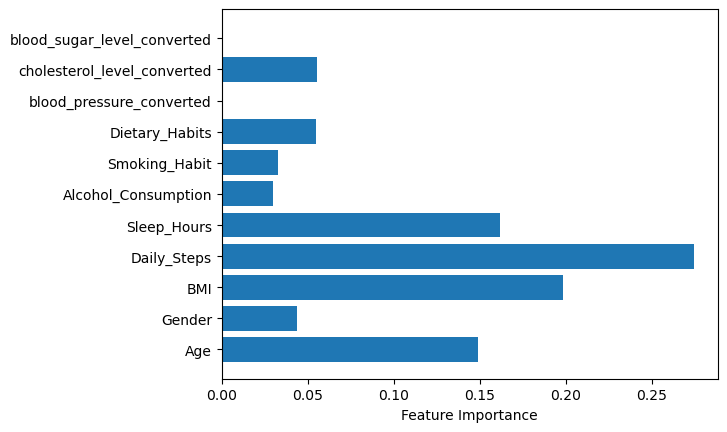

In [110]:
plt.barh(final_feature_names, dt_model.feature_importances_)
plt.xlabel("Feature Importance")

In [ ]:
class Patient:
    def __init__(self, name: str, 
                age: int, gender: str, 
                height: float, weight: float, 
                blood_pressure: LevelValue, 
                cholesterol_level:LevelValue, 
                blood_sugar_level: LevelValue, 
                daily_steps: int,
                sleep_hours : int = 7, 
                alcohol_consumption : bool = False, 
                smoking_habit : bool = False, 
                dietary_habit: str = "Regular"
                ):
        pass

    def user_to_train_feature_conv(self):
        pass